# Imports y paquetes importantes

In [2]:
# Instalar la librería a utilizar
# !pip install POT

In [3]:
# Author: Remi Flamary <remi.flamary@unice.fr>
#         Kilian Fatras <kilian.fatras@irisa.fr>
#
# License: MIT License

# sphinx_gallery_thumbnail_number = 4

import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot

Se definen los parámetros importantes de los puntos a gráficar

In [4]:
n = 50  # nb samples

mu_s = np.array([0, 0])
cov_s = np.array([[1, 0], [0, 1]])

mu_t = np.array([4, 4])
cov_t = np.array([[1, -.8], [-.8, 1]])

Se definen los puntos de forma que $x_s \sim \mathcal{N}(\mu_s, \Sigma_s)$ y $x_t \sim \mathcal{N}(\mu_t, \Sigma_t)$. Además se definen los pesos de forma uniforme. Notar que $x_s$ tiene dimensiones de $(50, 2)$, es decir, $(n_\text{data}, n_\text{dim})$.

In [5]:
xs = ot.datasets.make_2D_samples_gauss(n, mu_s, cov_s)
xt = ot.datasets.make_2D_samples_gauss(n, mu_t, cov_t)

a, b = np.ones((n,)) / n, np.ones((n,)) / n  # uniform distribution on samples

# loss matrix
M = ot.dist(xs, xt)

In [8]:
print(f"{xs.shape = }")

xs.shape = (50, 2)


Ploteamos los datos.

Text(0.5, 1.0, 'Cost matrix M')

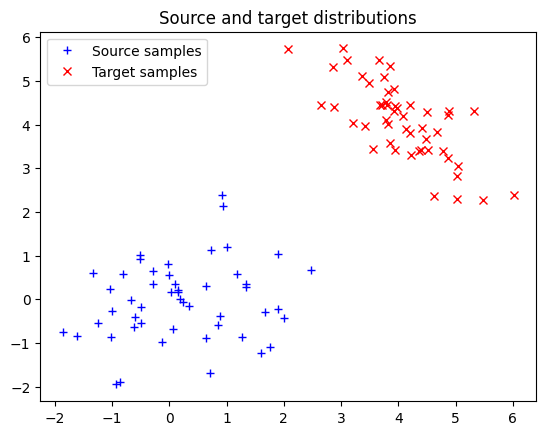

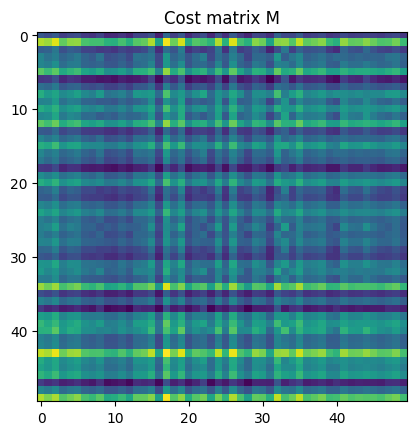

In [9]:
pl.figure(1)
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.legend(loc=0)
pl.title('Source and target distributions')

pl.figure(2)
pl.imshow(M, interpolation='nearest')
pl.title('Cost matrix M')

Hecho esto, computamos el EMD

Text(0.5, 1.0, 'OT matrix with samples')

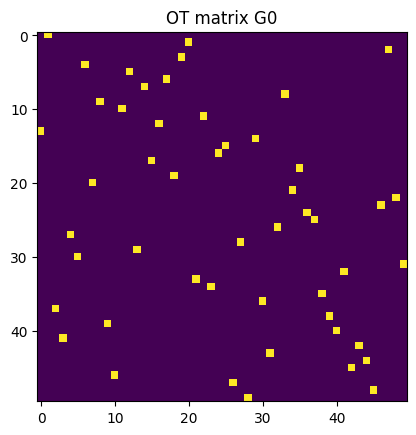

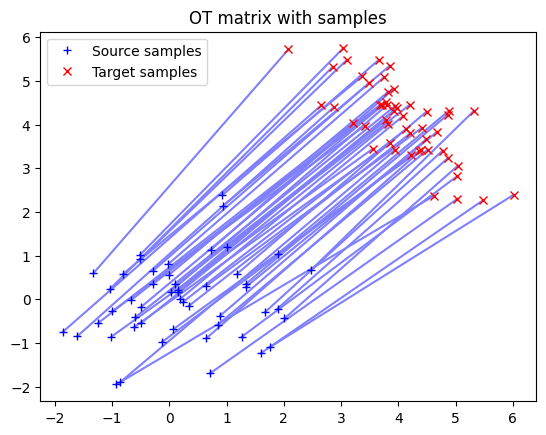

In [10]:
G0 = ot.emd(a, b, M)

pl.figure(3)
pl.imshow(G0, interpolation='nearest')
pl.title('OT matrix G0')

pl.figure(4)
ot.plot.plot2D_samples_mat(xs, xt, G0, c=[.5, .5, 1])
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.legend(loc=0)
pl.title('OT matrix with samples')